<a href="https://colab.research.google.com/github/FabianGarciaXY/Proyecto-Python/blob/main/Proyecto_python_bedu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">


# **Analisis de Sentimientos en Amazon reviews**

### **Proyecto de Procesamiento de Datos con Python**


</div>


---

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

---



*Proyecto de procesamiento y analisis de un dataset usando `Python`, `Pandas` y una API basada en NLP para analisis de sentimientos como por parte del modulo 3 en BEDU.* 
*Septiembre de 2022* 

<br>

**Equipo #14:**

* *Moises Alfredo Rubio Camacho*
* *César Andrés Vargas Romero*
* *Fabian Hernandez Garcia*

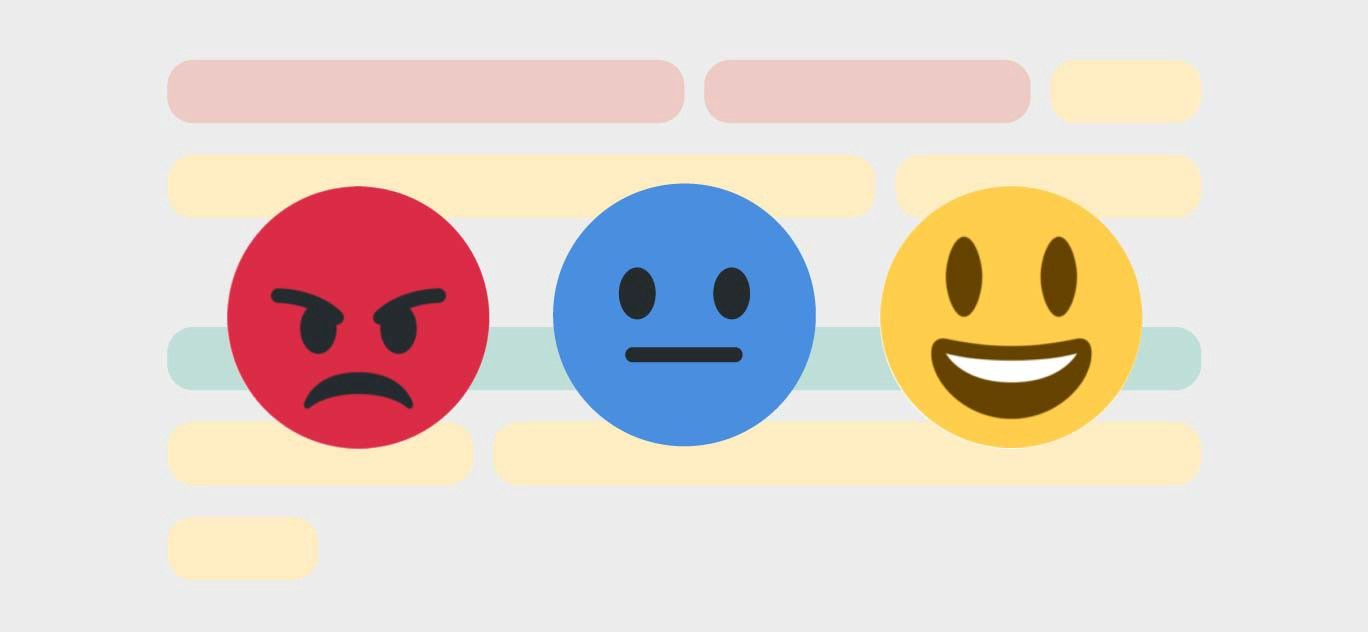
<br>





---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---



# Investigación
## Análisis de sentimientos
El análisis del sentimiento es un proceso en el que se usan algoritmos para determinar las emociones positivas o negativas que tienen las personas de una red respecto a un tema, producto, noticia, etc.
El análisis de sentimiento se refiere a los diferentes métodos de lingüística computacional que ayudan a identificar y extraer información subjetiva del contenido existente en el mundo digital (redes sociales, foros, webs, etc.). Gracias al análisis del sentimiento, podemos ser capaces de extraer un valor tangible y directo, como puede ser determinar si un texto extraído de la red Internet contiene connotaciones positivas o negativas.
El análisis de sentimientos, también conocido como minería de opinión, se trata de una tarea de clasificación masiva de documentos de manera automática, que se centra en catalogar los documentos en función de la connotación positiva o negativa del lenguaje ocupado en el mismo.
Con las redes sociales, los usuarios tienen hoy en día todo tipo de facilidades para mostrar sus opiniones sobre cualquier tema que deseen. Tener constancia sobre las opiniones referentes a una marca o producto y medir su impacto es actualmente de vital importancia para todas las empresas, ya que es tu imagen lo que está en juego.
Cuando se trata de análisis de sentimiento, ese proceso no es tan simple como localizar palabras clave, sino que requiere que una persona lea detenidamente un artículo para interpretar su tono. La tecnología temprana implementó algoritmos simples basados en lógica para identificar palabras como positivas o negativas, pero a menudo pasaba por alto el matiz de la comunicación humana y dejaba muchos términos sin clasificar
## Celulares “Bloqueados” en USA
Existen teléfonos que en la descripción dicen AT&T UNLOCKED o dicen T-MOBILE UNLOCKED y que es probable que funcionen en Venezuela, Argentina, México, Colombia o cualquier país de Latinoamérica.
El detalle está en que este tipo de teléfonos primero son comprados a una operadora móvil en estados unidos y luego los desbloquean por IMEI o por cualquier otro método de desbloqueo.
Solo debes tener en cuenta la frecuencia con la que trabaja la operadora móvil en tu país para ver si son compatibles con la operadora del celular que vas a comparar en Amazon estados unidos.
Por ejemplo, la frecuencia con la que trabaja T-Mobile en usa es compatible con Digitel para Venezuela.
Si realmente están libres o FULLY UNLOCKED. no deberías tener problema para comprarlos y ponerlos en funcionamiento en tu país.
Solo debes tener en cuenta que estos dispositivos ya han sido manipulados y que normalmente tienen pantallas o logos y apps relacionados con la marca de la operadora móvil estadounidense.
Si encuentras que en la descripción o título del celular que vas a comprar en Amazon dice FULLY UNLOCKED o Factory UNLOCKED, quiere decir que son celulares liberados completamente o que son liberados de fábrica.




---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---



# Definición del problema:

Amazon es una compañía estadounidense de comercio electrónico y servicios de computación en la nube a todos los niveles con sede en la ciudad de Seattle, Washington. Su lema es: From A to Z. Como equipo de Ciencia de datos de Amazon, se nos ha solicitado evaluar las relaciones precio/sentimientos.

Se busca contestar las siguientes preguntas:


* ¿Existe relación entre el Precio y los Ratings?
* ¿Existe relación entre el Precio y las Reseñas?
* ¿Existe relación entre el Rating y las Reseñas?
* ¿Qué productos tienen mayor cantidad de reseñas negativas?
* ¿Qué marca tienen mayor cantidad de reseñas negativas?
* ¿Qué marca tienen mayor porcentaje de reseñas negativas?
* ¿El porcentaje de reseñas negativas y ratings negativos es similar?
* ¿Cúantas reseñas negativas hay en los ratings 5 estrellas?






---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---


### **Obtencion del Dataset**

Buscamos varios data sets antes de elegir el final. También encontramos un proyecto de análiss de sentimientos en trip advisor que nos ayudó a entender como funcionan los algoritmos usados hoy en día.

Link de la base de datos inicial -  
https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

Notebook de analysis de sentimientos con tranformadores -    
https://www.kaggle.com/code/emirkocak/in-depth-series-sentiment-analysis-w-transformers/notebook


Al final, tomamos este dataset que tenía la data que estabamos buscando:

**Dataset:**

La base de datos llamada ["Amazon_Unlocked_Mobile_original"](https://www.kaggle.com/code/rahulvks/customer-review-analysis/data) contiene reseñas de compras al públicos de celulares desbloqueados para en **Amazon.com.** 



---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---

In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

In [ ]:
# Lectura del DataFrame
df_original = pd.read_csv("https://media.githubusercontent.com/media/FabianGarciaXY/Proyecto-Python/main/data/amazon_reviews_dirty.csv")
df_reviews = df_original.copy()

## **Exploración del Dataframe**

#### A continuación vamos a iniciar la exploración, tomamos una muestra de la parte superior del dataset para darnos una idea de la estructura

Para hacer una correcta exploración es necesario preguntarnos lo siguiente:

¿El conjunto de datos que tengo realmente me sirve para responder algunas de las preguntas que me planteé? - Sí, ya que tiene precio, review, votos de reviews. Al consultar nombre de la columna nos dimos cuenta.


¿Qué tamaño tiene mi conjunto de datos? ¿Serán datos suficientes? - Tiene más de 400,000 registros, es una población bastante grande, nosotros tomaremos una muestra para analizar.


¿Qué columnas tengo y qué información tengo en cada una de esas columnas?
Los nombres que tienen mis columnas, ¿son el nombre más apropiado?
'Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'.

Hay que limpiarlas pero los nombres son apropiados, unicamente ponerlo snake case.



¿Qué tipos de datos tengo en cada columna? ¿Parecen ser el tipo correcto de datos? ¿O es un tipo de datos "incorrecto"?
Product Name     object
Brand Name       object
Price           float64
Rating           object
Reviews          object
Review Votes     object
Vamos a trabajarlo más adelante, necesitamos varios cambios.

Si selecciono algunas filas al azar y las observo, ¿estoy obteniendo los datos que debería? ¿o hay datos que parecen estar "sucios" o "incorrectos"?

Hay varios datos sucios, que nos toca limpiar.






---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---

In [ ]:
# Exploracion
df_reviews.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"""5""",I feel so LUCKY to have found this used (phone...,"""1.0"""
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"""4""","nice phone, nice up grade from my pantach revu...","""0.0"""
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"""5""",Very pleased,"""0.0"""
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"""4""",It works good but it goes slow sometimes but i...,"""0.0"""
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"""4""",Great phone to replace my lost phone. The only...,"""0.0"""


In [ ]:
# Registros y columnas
print(f"El dataset cuenta con, {df_reviews.shape[0]} filas. \nY un total de {df_reviews.shape[1]} columnas de las cuales al parecer es un indice.")

El dataset cuenta con, 413840 filas. 
Y un total de 7 columnas de las cuales al parecer es un indice.


In [ ]:
# Tipos de datos
print("Tipos de datos: \n")
df_reviews.dtypes

Tipos de datos: 



Unnamed: 0        int64
Product Name     object
Brand Name       object
Price           float64
Rating           object
Reviews          object
Review Votes     object
dtype: object

In [ ]:
# Detalles de las columnas
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    413840 non-null  int64  
 1   Product Name  413840 non-null  object 
 2   Brand Name    348669 non-null  object 
 3   Price         407907 non-null  float64
 4   Rating        413840 non-null  object 
 5   Reviews       413778 non-null  object 
 6   Review Votes  413840 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.1+ MB


In [ ]:
# Valores unicos en la serie "Brand_Name" y "Rating"
number_of_brands = df_reviews["Brand Name"].unique().size
types_of_ratings = df_reviews["Rating"].unique()

print(f"Hay un total de {number_of_brands} marcas la columna 'Brand Name'.")
print(f"Los valores de los ratings son: {types_of_ratings}.")

Hay un total de 385 marcas la columna 'Brand Name'.
Los valores de los ratings son: ['"5"' '"4"' '"1"' '"2"' '"3"'].


---
<br>

<div align=center>

**Hasta este punto se observaron los siguientes detalles importantes:**<br>

</div>

* *El dataset contiene 413,840 filas y 6 columnas.*
* *Las columnas son: "Product Name", "Brand Name", "Price", "Rating", "Reviews", "Review Votes".*
* *3 columnas contienen datos numéricos: "Price", "Rating" y "Review Votes", pero solo "Price" es tipo Float, los demas son Object por lo que deben transformarse.*
* *Las columnas "Rating", "Brand Name" contienen datos categoricos.*
* *Son Reseñas de teléfonos móviles desbloqueados vendidos en Amazon.com.*
* *4 de las 6 columnas contienen datos nulos que sera necesario limpiar: "Brand Name", "Price", "Review" y "Review Votes".*

<br>

---

### **Transformación y Limpieza de Datos**

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

*Primero se decidió eliminar la columna `Unnamed: 0` ya que es un indice no necesario y se renombran las columnas.*

In [ ]:
# Primero eliminamos la columna "unnamed:_0" ya que al parecer era un indice
df_reviews = df_reviews.drop(columns=["Unnamed: 0"], axis=0)
df_reviews.columns.tolist()

['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

In [ ]:
# Renombramos las columnas con la convención snake_case
list_of_names = list(df_reviews.columns)
map_of_names = {value: value.lower().replace(" ", "_") for value in list_of_names}

df_reviews = df_reviews.rename(map_of_names, axis=1)

df_reviews.columns.tolist()

['product_name', 'brand_name', 'price', 'rating', 'reviews', 'review_votes']

<br>

*La columna `review_votes` es de tipo object pero con valores que contienen comillas extras ("") por lo que no permiten transformarlos a Int con `astype()` directamente, por lo cual primero se eliminan las esas comillas extras.*

In [ ]:
# review_votes con comillas extras
df_reviews["review_votes"].head(5)

0    "1.0"
1    "0.0"
2    "0.0"
3    "0.0"
4    "0.0"
Name: review_votes, dtype: object

In [ ]:
# Removemos las comillas extras
df_reviews['review_votes'] = df_reviews['review_votes'].map(lambda value: value.lstrip('"').rstrip('"'))

# Y convertimos a Integer
df_reviews["review_votes"] = df_reviews["review_votes"].apply(lambda value: float(value) if value else value)

df_reviews["review_votes"].dtypes

dtype('float64')

<br>

*Realizamos el mismo proceso con `rating`:*

In [ ]:
# Removemos las comillas extras
df_reviews['rating'] = df_reviews['rating'].map(lambda value: value.lstrip('"').rstrip('"'))

# Y convertimos a Integer
df_reviews["rating"] = df_reviews["rating"].apply(lambda value: int(value) if value else value)

print("'rating' es tipo: ", df_reviews["rating"].dtypes)

'rating' es tipo:  int64


In [ ]:
# Revisamos los tipos de datos nuevamente
df_reviews.dtypes

product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object

<br>

--- 

*Contando ya con los tipos de datos adecuados es posible comenzar remover o rellenar los NaNs y datos faltantes para tener el DataFrame completamente operable.*

---

<br>

*Empezamos contando la cantidad de datos nulos en nuestro dataset:*


In [ ]:
# Obtenemos la cantidad y porcentages datos nulos por columna
def get_null_values():
  print("Cantidad de NaNs:\n") 
  print(df_reviews.isna().sum(), "\n\n")
  print("Porcentage de NaNs:\n")
  print(df_reviews.isna().sum() / (len(df_reviews) * 100))

get_null_values()

Cantidad de NaNs:

product_name        0
brand_name      65171
price            5933
rating              0
reviews            62
review_votes    12296
dtype: int64 


Porcentage de NaNs:

product_name    0.000000
brand_name      0.001575
price           0.000143
rating          0.000000
reviews         0.000001
review_votes    0.000297
dtype: float64


<br>

*La columna con mas NaNs es `brand_name` con 65171 datos faltantes.*

*Al ser nombres de marcas (datos categóricos) sería posible rellenarlos con la moda, pero sesgaría los datos reales al rellenar esos 65171 datos con una sola marca. Por lo cual lo mas adecuado es eliminar dichas filas.*

In [ ]:
# Removemos los NaNs en "brand_name"
df_reviews = df_reviews.dropna(subset=["brand_name"])

# Verificamos los la cantidad de NaNs sea 0
print(df_reviews["brand_name"].isna().sum(), 'datos nulos en "brand_name"')

0 datos nulos en "brand_name"


<br>

*La siguente columna `reviews` contiene muy pocos NaNs.\
Sin embargo son datos crŕticos ya que se usarán solicitar a la API de Sentiment Analisys el sentimiento que hay en la reseña por lo cual NO puede existir datos Nulos, por lo que deben ser removidos.*

In [ ]:
# Removiendo los NaNs en "reviews"
df_reviews = df_reviews.dropna(subset=["reviews"])

# Verificamos los la cantidad de NaNs sea 0
print(df_reviews["reviews"].isna().sum(), 'datos nulos en la columna "reviews"')

0 datos nulos en la columna "reviews"


<br>

*A continuación la columna `review_votes` contiene la cantidad reseñas hay en cada producto:*

In [ ]:
# Estadisticos de la columna "review_votes"
df_reviews["review_votes"].describe()

count    338317.000000
mean          1.475634
std           9.188371
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         645.000000
Name: review_votes, dtype: float64

*Podemos ver que la media es de 1.4 reseñas y que el 75% almenos posee 1 reseña\
Al tratarse de datos no tan criticos se rellenarán con la **media**:*

In [ ]:
# Rellenamos con la media en review_votes
df_reviews["review_votes"] = df_reviews["review_votes"].fillna(df_reviews["review_votes"].mean())

<br>

*La ultima columna con NaNs es `price` en el cual no se puede rellenar con 0s o con el la media ya que podría afectar al precio real del producto por lo cual en este caso se eliminaran también.*

In [ ]:
# Removiendo los datos NaNs en "price"
df_reviews = df_reviews.dropna(subset=["price"])

# Verificando que el dataset este limpio
print(get_null_values())

print(f"\nTipos de datos:\n\n{df_reviews.dtypes}")

Cantidad de NaNs:

product_name    0
brand_name      0
price           0
rating          0
reviews         0
review_votes    0
dtype: int64 


Porcentage de NaNs:

product_name    0.0
brand_name      0.0
price           0.0
rating          0.0
reviews         0.0
review_votes    0.0
dtype: float64
None

Tipos de datos:

product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object


<br>

### **Obtención de datos a través de un API**

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


*Aparentemente el dataframe no contiene ningun NaN y los tipos de datos son los correctos.\
Sin embargo es necesario revisar las columnas con Strings ya que se usaran para el fetch a la API.*


*Inciamos con `brand_name`:*

Para análizar las marcas es necesario homogeneizar los nombres de cada marca, ya que hay casos donde la marca fue escrita de otra manera por los usuarios

In [ ]:
# Obtenemos la cantidad por marcas
df_reviews['brand_name'].value_counts()

Samsung         64786
BLU             60995
Apple           58087
LG              22311
BlackBerry      16872
                ...  
M-HORSE             1
ToShare Tech        1
LeEco               1
Danger Inc.         1
Concox              1
Name: brand_name, Length: 378, dtype: int64

In [ ]:
# Contamos el total de marcas inician con "Sam"
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)].value_counts()

Samsung                  64786
Samsung Korea LTD          839
Samsung Korea              150
Samssung                   106
Samsung international       49
Samsung/Straight Talk        9
Samsung Galaxy               4
Samsybg Galaxy               4
Samsung International        2
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)]= "Samsung"

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)].value_counts()

Samsung    65949
Name: brand_name, dtype: int64

In [ ]:
# Contamos las marcas que inician con "App"
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)].value_counts()

Apple             58087
Apple Computer       10
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)]="Apple"

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)].value_counts()

Apple    58097
Name: brand_name, dtype: int64

In [ ]:
# Contamos las marcas que inician con "LG"
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)].value_counts()

LG                               22311
LG Electronics                    3104
LG Electronics MobileComm USA      329
LGIC                                24
LGG                                  3
LG Electronic                        2
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)]="LG"

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)].value_counts()

LG    25773
Name: brand_name, dtype: int64

<br>

*Limpiamos y analizamos la columna `reviews` para evitar registros duplicados o errores por algun tipo de carácter:*


In [ ]:
# Revisamos si hay duplicados
df_reviews["reviews"].duplicated().sum()

202930

---

*Hemos detectado 205,501 lineas repetidas, por lo que procederemos a removerlas y mantener la primera registrada:*

---

In [ ]:
# Removemos duplicados
df_reviews = df_reviews.drop_duplicates(subset="reviews", keep="first")

In [ ]:
# Volvemos a contarlos
df_reviews.duplicated().sum()

0

*Vemos los detalles antes de proseguir:*

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141578 entries, 0 to 413829
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   product_name  141578 non-null  object 
 1   brand_name    141578 non-null  object 
 2   price         141578 non-null  float64
 3   rating        141578 non-null  int64  
 4   reviews       141578 non-null  object 
 5   review_votes  141578 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.6+ MB


*Ya tenemos unicamente 141,578 registros unicos por lo que vamos a reindexar.\
Sin embargo por la cantidad de request que nos permite hacer la API no podremos leer todo, tomaremos solo 1% de la data actual de ahora en adelante.*

*Decidimos tomar la data que va del 50% al 51%:*

In [ ]:
# Reseteamos el index
df_reviews.reset_index(drop=True)

,product_name,brand_name,price,rating,reviews,review_votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
141573,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,works great and picks up signal in place my ot...,0.0
141574,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0
141575,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0
141576,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,just as described perfect for the price,0.0


<br>

*Calcularemos los deciles:*

In [ ]:
df_reviews.shape[0]/100

1415.78

*Tomamos del 50-51 y creamos un nuevo DataFrame:*

In [ ]:
print(df_reviews.shape[0]/100*50)
df_reviews.shape[0]/100*51

70789.0


72204.78

In [ ]:
# Nuevo DataFrame
df_sentiment = df_reviews.iloc[71561:72992, :]

<br>

*Ahora con nuestro nuevo dataset, volvemos a reiniciar el index:*

In [ ]:
df_sentiment.reset_index(drop = True)

,product_name,brand_name,price,rating,reviews,review_votes
0,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,5,I made a wrong complaint. And rude. But he was...,0.0
1,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,4,My old phone front glass was broken and could ...,0.0
2,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,5,The cell phone was used but appeared in almost...,0.0
3,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,1,phone was defective people could not hear me t...,0.0
4,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,3,"Did not work out of the box, No contact info o...",0.0
...,...,...,...,...,...,...
1426,"Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5"" U...",Nokia,77.99,4,its a nice phone,0.0
1427,"Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5"" U...",Nokia,77.99,5,Product arrived in 1 week. It is a new phone. ...,1.0
1428,"Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5"" U...",Nokia,77.99,4,Completely satisfied. Only doubt is that it wa...,0.0
1429,"Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5"" U...",Nokia,77.99,5,Working well so far!,0.0


<br>

---

*Nos dimos cuenta que había unos caracteres que podían ser procesados por la API por lo que usamos una función lambda para limpiar la data de esos caracteres:*

---

In [ ]:
# La columna reviews de tipo object contiene datos texto y algunos con emojis
df_sentiment.dtypes

product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object

In [ ]:
# Creamos un nuevo dataframe sin emojis
df_sentiment_no_emojis = df_sentiment.copy()
df_sentiment_no_emojis['reviews'] = df_sentiment_no_emojis['reviews'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

<br>

*Durante el uso de la api nos hicimos una cuenta en la página rapid API. Donde existen miles de apis listas para usar, en nuestro caso tenemos una licencia freemium con un limite muy bajo.*

**Por favor no corras este código si no es complemtamente necesario.** 

In [ ]:
url = "https://japerk-text-processing.p.rapidapi.com/sentiment/"
headers = {
  "content-type": "application/x-www-form-urlencoded",
  "X-RapidAPI-Key": "6005627361mshf5ac6e9e243228fp1b445ajsn6f356e95d9b7",
  "X-RapidAPI-Host": "japerk-text-processing.p.rapidapi.com"
}

In [ ]:
def getSentiment(value):
  
  #Por favor no uses mi Api Key, tenemos un numero limitado de requests muy pequeño y se va a bloquear.

  
  response = requests.request("POST", url, data="language=english&text="+value, headers=headers)
  print("Status code: ", response.status_code)
  print("Printing Entire Post Request")
  print(response.json())
  json = response.json()
  y = json['label']
  if y=='pos':
    return 1
  elif y=='neg':
    return -1
  else:
    return 0

<br>

*Es necesario imprimir los responses para detectar errores a tiempo*

In [ ]:
df_sentiment_no_emojis['sentiment'] = df_sentiment_no_emojis['reviews'].apply(getSentiment)

Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.7943659043881829, 'neutral': 0.23732150044493938, 'pos': 0.2056340956118171}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.7269115286306618, 'neutral': 0.6382964950225131, 'pos': 0.2730884713693382}, 'label': 'neutral'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.19146008802353798, 'neutral': 0.13864641869838792, 'pos': 0.808539911976462}, 'label': 'pos'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.7547935364049255, 'neutral': 0.13809573804560318, 'pos': 0.24520646359507445}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.7543023166184828, 'neutral': 0.9538062171392818, 'pos': 0.24569768338151726}, 'label': 'neutral'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.7907193639041851, 'neutral': 0.16424422049484896, 'pos': 0.20928063609581493}, 'labe

In [ ]:
df_sentiment_no_emojis.head()

,product_name,brand_name,price,rating,reviews,review_votes,sentiment
238388,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,5,I made a wrong complaint. And rude. But he was...,0.0,-1
238389,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,4,My old phone front glass was broken and could ...,0.0,0
238390,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,5,The cell phone was used but appeared in almost...,0.0,1
238391,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,1,phone was defective people could not hear me t...,0.0,-1
238392,LG VX-8350 Dark Gray Cell Phone for Verizon Wi...,LG,69.99,3,"Did not work out of the box, No contact info o...",0.0,0



*Los sentimientos del review son catégoricos donde:*

* *1: Positivo*
* *0: Neutro*
* *-1: Negativo*


In [ ]:
# Cambiamos la columna sentiment a category
df_sentiment_no_emojis["sentiment"]=df_sentiment_no_emojis["sentiment"].astype("category")

In [ ]:
df_sentiment_no_emojis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 238388 to 241500
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   product_name  1431 non-null   object  
 1   brand_name    1431 non-null   object  
 2   price         1431 non-null   float64 
 3   rating        1431 non-null   int64   
 4   reviews       1431 non-null   object  
 5   review_votes  1431 non-null   float64 
 6   sentiment     1431 non-null   category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 79.8+ KB


In [ ]:
df_sentiment_no_emojis.describe()

,price,rating,review_votes
count,1431.000000,1431.000000,1431.000000
mean,153.753180,3.567435,1.769452
std,106.250213,1.574100,5.555166
min,6.990000,1.000000,0.000000
25%,77.990000,2.000000,0.000000
50%,129.990000,4.000000,0.000000
75%,255.990000,5.000000,1.475634
max,388.000000,5.000000,96.000000


<br>

### **Análisis de Datos**

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


*Siendo categoricos pasamos a responder la siguientes preguntas:*



*   *¿Qué productos tienen mayor cantidad de reseñas negativas?*
*   *¿Qué marca tienen mayor cantidad de reseñas negativas?*
*   *¿Qué marca tienen mayor porcentaje de reseñas negativas?*





In [ ]:
df_brand = df_sentiment_no_emojis[["product_name", "sentiment"]][df_sentiment_no_emojis['sentiment']==-1].groupby(['product_name'], as_index = False).count()
df_brand.sort_values([ "sentiment"],ascending=False).head(1)

,product_name,sentiment
8,LG Xenon GR500 Unlocked Phone with QWERTY Keyb...,138


*El telefono LG Xenon GR500 es el producto con mayor cantidad de reseñas negativas*

In [ ]:
df_brand=df_sentiment_no_emojis[["brand_name", "sentiment"]][df_sentiment_no_emojis['sentiment']==-1].groupby(['brand_name'], as_index = False).count()
df_brand.sort_values([ "sentiment"],ascending=False).head(1)

,brand_name,sentiment
3,LG,241


*Podemos ver que LG es la marca con mayor numero de reseñas negativas*

In [ ]:
df_negatives=df_brand.sort_values([ "sentiment"],ascending=False)

In [ ]:
df_no_negatives=df_sentiment_no_emojis[["brand_name", "sentiment"]][df_sentiment_no_emojis['sentiment']!=-1].groupby(['brand_name'], as_index = False).count()

In [ ]:

df_new_negatives= df_negatives.rename(columns={"sentiment": "negative"})

df_merged = df_new_negatives.merge(df_no_negatives, how='right') 

df_merged

,brand_name,negative,sentiment
0,BLU,80.0,123
1,Kyocera,1.0,2
2,LG,241.0,235
3,LifeProof,36.0,76
4,Lumen,5.0,3
5,MANN ZUG S Rugged Phone,3.0,1
6,MEIZU,2.0,1
7,Mango Natural,35.0,33
8,Marozi International Ltd,NaN,1
9,Maxwest,3.0,3


*Vamos a quitar los NaN porque deberían ser 0s ya que no hay valores negativos*

In [ ]:
df_merged=df_merged.fillna(0)
df_merged

,brand_name,negative,sentiment
0,BLU,80.0,123
1,Kyocera,1.0,2
2,LG,241.0,235
3,LifeProof,36.0,76
4,Lumen,5.0,3
5,MANN ZUG S Rugged Phone,3.0,1
6,MEIZU,2.0,1
7,Mango Natural,35.0,33
8,Marozi International Ltd,0.0,1
9,Maxwest,3.0,3


In [ ]:
df_merged['percentage']=df_merged['negative']/(df_merged['negative']+df_merged['sentiment'])*100

In [ ]:
df_merged[['brand_name','percentage']].sort_values(by='percentage', ascending=False).head(1)

,brand_name,percentage
5,MANN ZUG S Rugged Phone,75.0


*La marca MANN ZUG tiene el 75% de sus reviews negativas, por lo que es la que más tiene.*


In [ ]:
df_sentiment_no_emojis.groupby(['brand_name']).sum()

,price,rating,review_votes
brand_name,,,
BLU,40740.00,768,299.378169
Jersa,23.99,1,17.000000
Kyocera,209.97,9,0.000000
LG,55142.99,1506,755.378169
LifeProof,782.88,317,75.000000
Lumen,976.00,28,2.000000
M-HORSE,130.00,1,14.000000
MANN ZUG S Rugged Phone,198.00,15,3.000000
MEIZU,829.97,7,2.000000


*¿Existe una correlación entre el Precio y los Ratings?*

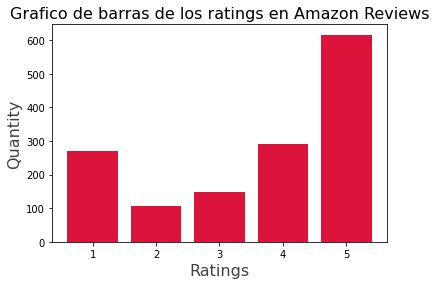

In [ ]:
# Distribución del rating de las reviews

counts = df_sentiment_no_emojis["rating"].value_counts()
values = df_sentiment_no_emojis["rating"].unique()

plt.bar(values, counts, color='crimson')
plt.title("Grafico de barras de los ratings en Amazon Reviews", fontsize=16)
plt.xlabel('Ratings', color= '#44433C', fontsize='16')
plt.ylabel('Quantity', color= '#44433C', fontsize='16')

plt.show()

Como conclusión en base al análisis de correlación; No existe evidencia que hay una correlación positiva o negativa entre el precio y los ratings, eso quiere decir que hay buenos ratings, a precios más bajos, así como hay buenos precios de ratings a precios muy caros; es decir, que independientemente de los precios, hay tanto ratings positivos, como ratings negativos

¿Existe una correlación entre el precio y el número de reseñas?

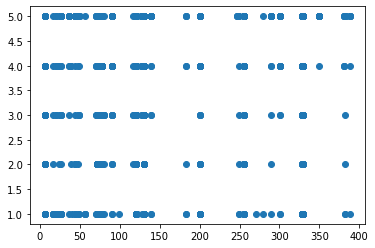

In [ ]:
#se crea el diagrama de dispersión entre 2 columnas
plt.scatter(df_sentiment_no_emojis['price'], df_sentiment_no_emojis['rating'])


Como conclusión en base al análisis de la correlación, No existe una correlación entre el precio y el número de reseñas, ya que, hay precios bajos con muchas reseñas, y hay precios altos con pocas reseñas.

¿Cuál es el valor de rating con más votos?

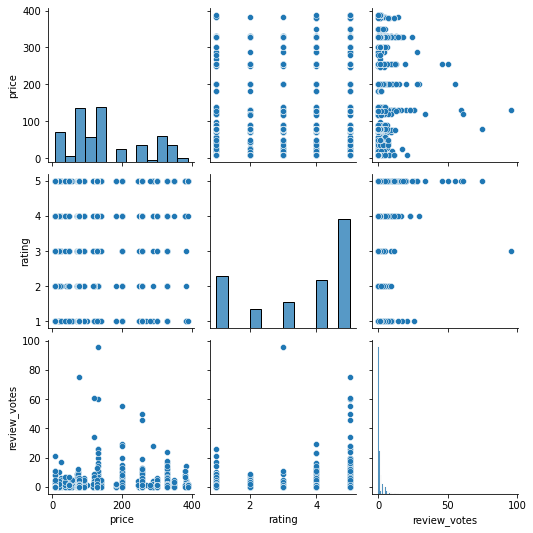

In [ ]:
sns.pairplot(df_sentiment_no_emojis)

Como conclusión podemos observar que el valor del rating con mayor votación fue el número 5, es decir, mejor valorado.

<br>

¿El porcentaje de reseñas negativas y ratings negativos es similar?

In [ ]:
# Obtenemos el porcentage de reseñas negativas
total_negative_reviews = df_sentiment_no_emojis[df_sentiment_no_emojis["sentiment"] == -1]["sentiment"].count()
total_rows = len(df_sentiment_no_emojis)

print(f"El porcentanje de reviews negativas es {(total_negative_reviews / total_rows) * 100}.")

# Obtenemos el porcentage ratings negativos
total_negative_ratings = df_sentiment_no_emojis[(df_sentiment_no_emojis["rating"] == 1) | (df_sentiment_no_emojis["rating"] == 2)]["sentiment"].count()

print(f"El porcentanje de ratings negativos es {(total_negative_ratings / total_rows) * 100}.")

El porcentanje de reviews negativas es 41.788958770090844.
El porcentanje de ratings negativos es 27.812718378756113.


Hay gran diferencia entre los porcentages. Esto se puede deber a que el rating puede ser algo ambiguo: alguien puede calificar con 3 estrellas una pésima compra, mientras que otra puede dar 3 estrellas como "suficiente".

<br>

¿Cúantas reseñas negativas hay en los ratings 5 estrellas?

In [ ]:
# Creamos una codición donde para filtrar
negative_but_five_stars = (df_sentiment_no_emojis["rating"] == 5) & (df_sentiment_no_emojis["sentiment"] == -1)

# Aplicamos el filtro y contamos cuanta la cantidad de rows
bad_reviews = df_sentiment_no_emojis["reviews"][negative_but_five_stars].count()

print("Hubo un total de {} reseñas negativas pero con buena calificación".format(bad_reviews))

Hubo un total de 138 reseñas negativas pero con buena calificación


Como podemos observar hay un total de 138 reseñas en las que las personas calificaron con 5 puntos y sin embargo en la reseña expresaron negatividad en la compra.

<br>

### **Conclusiones**

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Despues de este análisis podemos concluir que falta mucho para lograr un balance entre opiniones negativas y positivas. Podemos asumir que las personas que comentan, no representan la opinión de la personas que dan raiting.

También podemos afirmar que la mayoría de las personas que dan comentarios no son positivos. 

Notamos que no existe correlación entre los precios y la cantidad de reviews.

Ademas encontramos que en los casos de reseñas y ratings, estos se diferenciaban notablemente de un 41 a 27 por ciento por lo cual hubo discrepancia entre los ratings dados y los sentimientos identificados en las reseñas.

Existe una distorción clara entre el sentimiento del review y del rating.
Esto puede deberse a que el medir un sentimiento con más de 3 elementos puede ser abrumador para los clientes. O la posición de los botones hacen dificil su correcta gestión.

Concluimos con que la muestra tiene capacidad de ser mayor y poder dar un resultado más completo. Por lo que sugerimos invertir en este proyecto y maximizar la información.



### **Referencias**

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

* Api para analizar sentimientos - 
https://rapidapi.com/mikerlynn/api/text-tone-sentiment/

* Link de la base de datos inicial -  
https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

* Notebook de analysis de sentimientos con tranformadores - 
https://www.kaggle.com/code/emirkocak/in-depth-series-sentiment-analysis-w-transformers/notebook

* Base de datos:
https://www.kaggle.com/code/rahulvks/customer-review-analysis/data

* Liga de Analisis de Base de datos
https://www.kdnuggets.com/2017/01/data-mining-amazon-mobile-phone-reviews-interesting-insights.html


### **Video**